## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
len(merged_df["Mouse ID"])

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

get_duplicates = merged_df.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name = 'count')
get_duplicates[get_duplicates["count"]>1]


,Mouse ID,Timepoint,count
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df[merged_df["Mouse ID"] == "g989"]
len(duplicate_mouse)

13

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicate = merged_df[merged_df["Mouse ID"] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
len(remove_duplicate)

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
remove_duplicate.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

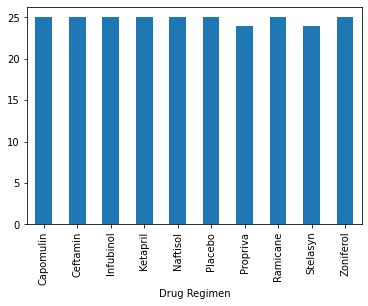

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
totalmice = remove_duplicate.groupby("Drug Regimen")["Mouse ID"].nunique()
totalmice.plot.bar()

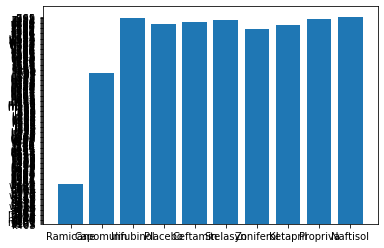

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#plt.bar(totalmice)
#plt.bar(range(len(totalmice)), totalmice)
plt.bar('Drug Regimen', 'Mouse ID', data = remove_duplicate)
plt.show()

<AxesSubplot:xlabel='Drug Regimen'>

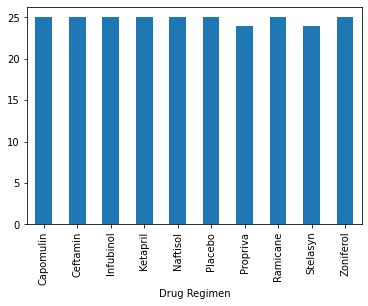

In [12]:
remove_duplicate.groupby("Drug Regimen")["Mouse ID"].nunique().plot(kind = 'bar')

<AxesSubplot:ylabel='Mouse ID'>

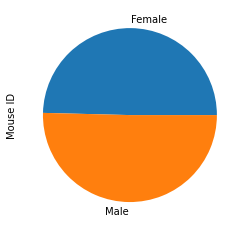

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexmice = remove_duplicate.groupby("Sex")["Mouse ID"].nunique()
sexmice.plot.pie()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime = remove_duplicate.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedtime = pd.merge(maxtime, remove_duplicate, on = ["Mouse ID", "Timepoint"])
mergedtime[['Mouse ID', 'Tumor Volume (mm3)']]

,Mouse ID,Tumor Volume (mm3)
0,a203,67.973419
1,a251,65.525743
2,a262,70.717621
3,a275,62.999356
4,a366,63.440686
...,...,...
243,z435,48.710661
244,z578,30.638696
245,z581,62.754451
246,z795,65.741070


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treaments = remove_duplicate['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
